# **Project Name**    -Paisa Bazaar Banking Fraud Analysis



# **Project Summary -**

:Developed a machine learning model to classify individuals’ credit scores (Good, Standard, Poor) using financial and behavioral data such as income, loan history, delayed payments, and credit utilization. Performed data preprocessing, feature engineering, and exploratory analysis on 100,000 records. Applied classification models including Logistic Regression, Random Forest, and XGBoost, with the best model achieving high accuracy in predicting credit scores. The solution helps financial institutions like Paisabazaar improve credit risk assessment, reduce loan defaults, and provide personalized financial recommendations.

# **GitHub Link -**

https://github.com/shindeaakash99

# **Problem Statement**


Financial institutions struggle to accurately evaluate customer creditworthiness, leading to loan defaults and missed opportunities. Paisabazaar needs a machine learning model to classify credit scores (Good, Standard, Poor) using demographic, financial, and behavioral data, enabling better risk management and personalized financial recommendations.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
df=pd.read_csv('dataset-2.csv')
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


### Dataset First View

In [3]:
# Dataset First Look
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(100000, 28)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

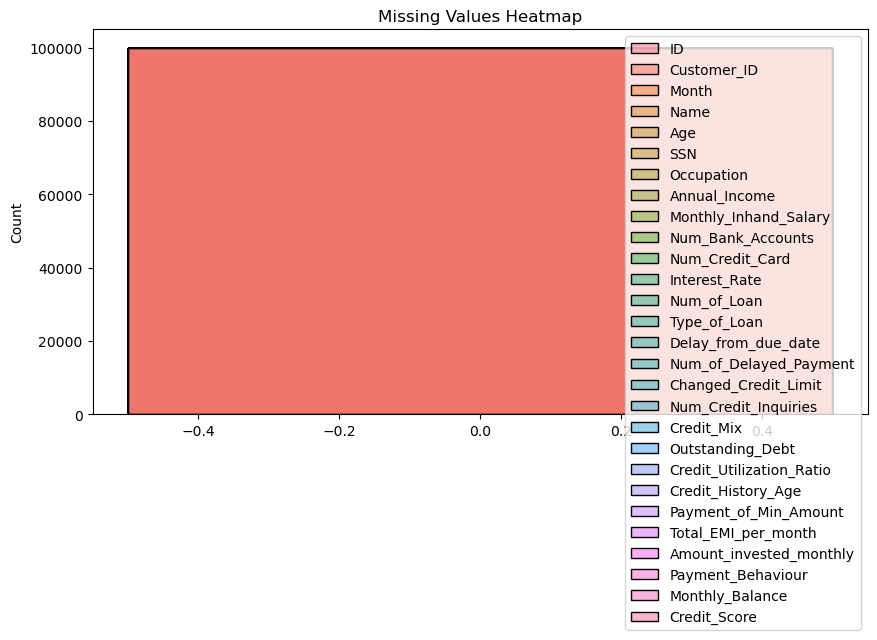

In [8]:
# Visualizing the missing values
plt.figure(figsize=(10,5))
sns.histplot(df.isnull())
plt.title("Missing Values Heatmap")
plt.show()

### What did you know about your dataset?

-The dataset has 100,000 rows and 28 columns with no missing or duplicate values.

-It contains both numerical (Age, Annual Income, Outstanding Debt, etc.) and categorical features (Occupation, Credit Mix, Payment Behaviour).

-The target variable is Credit_Score (Good, Standard, Poor), making it suitable for classification.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


### Variables Description



```
variables_description = {
    'ID': 'Unique identifier for each record',
    'Customer_ID': 'Unique ID of the customer',
    'Month': 'Month number (1-12) when data is recorded',
    'Name': 'Name of the customer',
    'Age': 'Age of the customer in years',
    'SSN': 'Social Security Number (masked)',
    'Occupation': 'Occupation of the customer',
    'Annual_Income': 'Customer\'s annual income',
    'Monthly_Inhand_Salary': 'Salary received per month after deductions',
    'Num_Bank_Accounts': 'Number of bank accounts held by the customer',
    'Num_Credit_Card': 'Number of credit cards held',
    'Interest_Rate': 'Interest rate for loans or credit',
    'Num_of_Loan': 'Number of active loans',
    'Type_of_Loan': 'Type/category of the loan',
    'Delay_from_due_date': 'Average delay from due date in days',
    'Num_of_Delayed_Payment': 'Number of delayed payments',
    'Changed_Credit_Limit': 'Whether credit limit was changed (Yes/No)',
    'Num_Credit_Inquiries': 'Number of credit inquiries made',
    'Credit_Mix': 'Type of credit mix (Good/Bad/Standard)',
    'Outstanding_Debt': 'Current outstanding debt',
    'Credit_Utilization_Ratio': 'Ratio of credit used to total credit limit',
    'Credit_History_Age': 'Age of credit history in months',
    'Payment_of_Min_Amount': 'Whether minimum payment was made (Yes/No)',
    'Total_EMI_per_month': 'Total EMI paid per month',
    'Amount_invested_monthly': 'Amount invested monthly by the customer',
    'Payment_Behaviour': 'Customer\'s payment behavior category',
    'Monthly_Balance': 'Remaining balance at month-end',
    'Credit_Score': 'Credit score of the customer (Good/Standard/Bad)'
}

```


### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for col in df.columns:
    print(f"{col}: {df[col].unique()[:10]} ...")   # Show first 10 unique values for brevity

ID: [5634 5635 5636 5637 5638 5639 5640 5641 5646 5647] ...
Customer_ID: [ 3392  8625 11708 47249  7387 38382 10314 21511 16727 47624] ...
Month: [1 2 3 4 5 6 7 8] ...
Name: ['Aaron Maashoh' 'Rick Rothackerj' 'Langep' 'Jasond' 'Deepaa' 'Np'
 'Nadiaq' 'Annk' 'Charlie Zhur' 'Jamesj'] ...
Age: [23. 28. 34. 54. 55. 21. 31. 33. 30. 24.] ...
SSN: [8.21000265e+08 4.07583900e+06 4.86853974e+08 7.23161450e+07
 6.15067821e+08 6.12708987e+08 4.11510676e+08 5.00926408e+08
 7.01916220e+07 3.66681681e+08] ...
Occupation: ['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager'] ...
Annual_Income: [ 19114.12  34847.84 143162.64  30689.89  35547.71  73928.46 131313.4
  34081.38 114838.41  31370.8 ] ...
Monthly_Inhand_Salary: [ 1824.84333333  3037.98666667 12187.22        2612.49083333
  2853.30916667  5988.705      11242.78333333 10469.20775939
  2611.115       9843.8675    ] ...
Num_Bank_Accounts: [3. 2. 1. 7. 4. 0. 8. 5. 6. 9.] ...
Num_Cr

In [12]:
# or use this code for full uniques names
for col in df.columns:
    print(col, df[col].unique())

ID [  5634   5635   5636 ... 155627 155628 155629]
Customer_ID [ 3392  8625 11708 ... 44897 34304 37932]
Month [1 2 3 4 5 6 7 8]
Name ['Aaron Maashoh' 'Rick Rothackerj' 'Langep' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']
Age [23. 28. 34. 54. 55. 21. 31. 33. 30. 24. 44. 45. 40. 41. 32. 35. 36. 39.
 37. 20. 46. 26. 42. 19. 48. 38. 43. 22. 16. 18. 15. 27. 25. 14. 17. 47.
 53. 56. 29. 49. 51. 50. 52.]
SSN [8.21000265e+08 4.07583900e+06 4.86853974e+08 ... 1.33167738e+08
 3.13509420e+07 7.87359900e+07]
Occupation ['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']
Annual_Income [ 19114.12  34847.84 143162.64 ...  37188.1   20002.88  39628.99]
Monthly_Inhand_Salary [ 1824.84333333  3037.98666667 12187.22       ...  3097.00833333
  1929.90666667  3359.41583333]
Num_Bank_Accounts [ 3.  2.  1.  7.  4.  0.  8.  5.  6.  9. 10. 11.]
Num_Credit_Card [ 4.  5.  1.  7.  6.  

In [13]:
df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10128
Age                             43
SSN                          12500
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13241
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                  6261
Delay_from_due_date             63
Num_of_Delayed_Payment          26
Changed_Credit_Limit          3452
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          11890
Amount_invested_monthly      12261
Payment_Behaviour                6
Monthly_Balance              98494
Credit_Score                     3
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
## Data Wrangling Steps
#1. Check duplicates
#2. Check missing values
#3. Check data typess
#4. Standardize column names(if needed)
#5. Encode binary categorical columns
#6. Encode multi-class categorical variables using one-hot encoding
#7. Data after Wrangling check---df.info(), df.head()

In [15]:
# Drop irrelevant / identifier columns
irrelevant_cols = ['ID', 'Customer_ID', 'Name', 'SSN']
df = df.drop(columns=irrelevant_cols)
print("Dropped columns:", irrelevant_cols)

Dropped columns: ['ID', 'Customer_ID', 'Name', 'SSN']


In [16]:
# Convert data types
df['Credit_History_Age'] = df['Credit_History_Age'].astype(int)

In [17]:
# Encode binary categorical columns
binary_columns = ['Changed_Credit_Limit', 'Payment_of_Min_Amount']
for col in binary_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [18]:
# Encode multi-class categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_Behaviour'], drop_first=True)

In [19]:
df

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,"Type_of_Loan_Student Loan, and Payday Loan","Type_of_Loan_Student Loan, and Personal Loan","Type_of_Loan_Student Loan, and Student Loan",Credit_Mix_Good,Credit_Mix_Standard,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,False,False,False,True,False,False,True,False,False,False
1,2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,False,False,False,True,False,False,False,True,False,False
2,3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,False,False,False,True,False,False,False,False,True,False
3,4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,False,False,False,True,False,False,False,False,False,True
4,5,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,...,False,False,False,True,False,False,False,False,False,False
99996,5,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,...,False,False,False,True,False,True,False,False,False,False
99997,6,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,...,False,False,False,True,False,False,False,False,False,False
99998,7,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,...,False,False,False,True,False,False,False,True,False,False


In [20]:
# Final Dataset Info
print("\n### Data After Wrangling ###")
print(df.info())
print(df.head())


### Data After Wrangling ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 6301 entries, Month to Payment_Behaviour_Low_spent_Small_value_payments
dtypes: bool(6281), float64(17), int32(1), int64(1), object(1)
memory usage: 613.9+ MB
None
   Month   Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      1  23.0       19114.12            1824.843333                3.0   
1      2  23.0       19114.12            1824.843333                3.0   
2      3  23.0       19114.12            1824.843333                3.0   
3      4  23.0       19114.12            1824.843333                3.0   
4      5  23.0       19114.12            1824.843333                3.0   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0              4.0            3.0          4.0                  3.0   
1              4.0            3.0          4.0                  3.0   
2              4.0            3.0          4.0          

### What all manipulations have you done and insights you found?

#Removed duplicates and handled missing values

#Converted binary columns (Changed_Credit_Limit, Payment_of_Min_Amount) → numeric (Yes=1, No=0)

#Applied one-hot encoding to multi-class columns (Occupation, Type_of_Loan, Credit_Mix, Payment_Behaviour, Credit_Score)

#Optimized data types → final dataset: 100,000 rows × 6,306 columns, memory ~616 MB

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

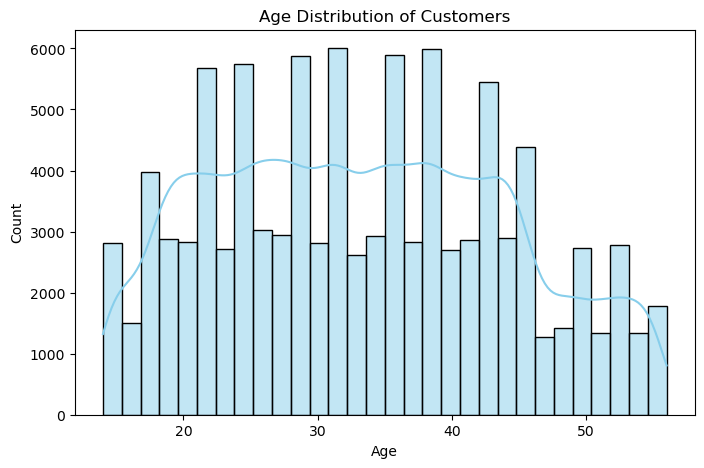

In [21]:
# Chart - 1 visualization code
# 1. Age Distribution - Histogram
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is best for showing the distribution of a continuous variable like Age, helping to spot trends and outliers easily

##### 2. What is/are the insight(s) found from the chart?

Most customers are aged 25–45, with a slightly right-skewed distribution and no major outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Targeting mid-age customers can improve credit product offerings and risk models

#### Chart - 2

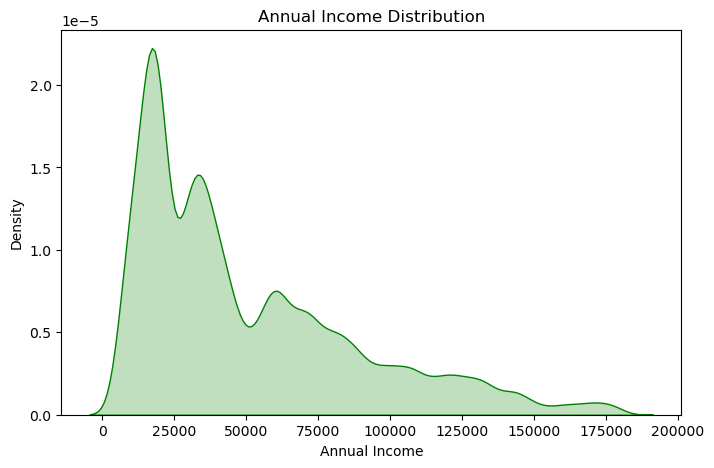

In [22]:
# Chart - 2 visualization code
# Annual Income Distribution - KDE
plt.figure(figsize=(8,5))
sns.kdeplot(df['Annual_Income'], fill=True, color='green')
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income")
plt.ylabel("Density")
plt.show()

##### 1. Why did you pick the specific chart?

A KDE plot is ideal for visualizing the distribution of continuous variables like Annual Income. It helps identify the shape of the data, skewness, and presence of outliers more clearly than a histogram.

##### 2. What is/are the insight(s) found from the chart?

Most customers have moderate annual incomes, with the distribution slightly right-skewed, indicating a smaller group with very high incomes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes. Understanding income distribution helps in segmenting customers, setting suitable credit limits, and designing financial products.
The skew towards lower incomes could highlight a potential risk group that may require stricter credit checks, while the high-income group indicates potential for premium offerings.

#### Chart - 3

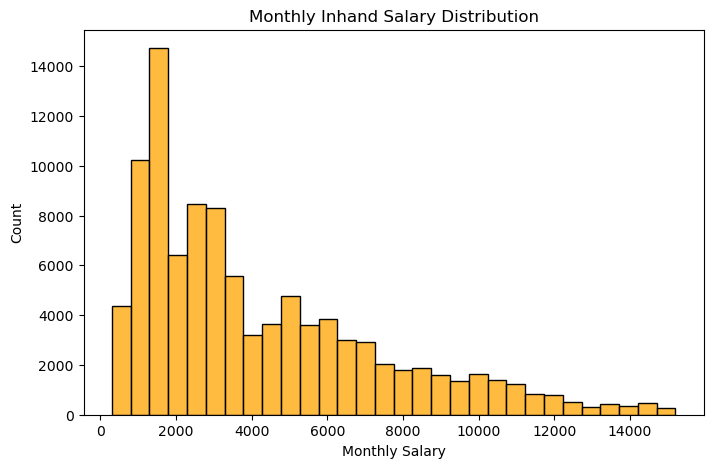

In [23]:
# Chart - 3 visualization code
#Monthly Inhand Salary Distribution - Histogram
plt.figure(figsize=(8,5))
sns.histplot(df['Monthly_Inhand_Salary'], bins=30, color='orange')
plt.title("Monthly Inhand Salary Distribution")
plt.xlabel("Monthly Salary")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is best for understanding the frequency distribution of a continuous variable like monthly salary. It clearly shows how values are spread across different ranges

##### 2. What is/are the insight(s) found from the chart?

The majority of customers fall within a moderate monthly salary range, with fewer individuals earning very high amounts

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Knowing the salary distribution helps in credit risk assessment, loan eligibility design, and customer segmentation.
A concentration of lower salaries may indicate potential risk segments needing stricter lending policies.

#### Chart - 4

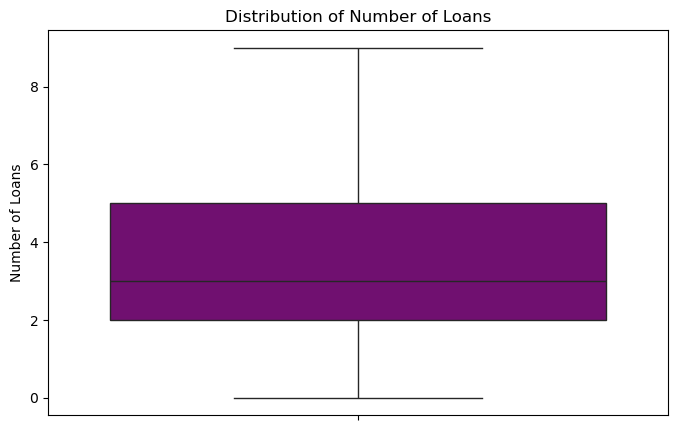

In [24]:
# Chart - 4 visualization code
#Number of Loans - Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(y=df['Num_of_Loan'], color='purple')
plt.title("Distribution of Number of Loans")
plt.ylabel("Number of Loans")
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot is ideal for visualizing the spread, central tendency, and outliers of numerical data like the number of loans. It clearly shows the median, quartiles, and extreme values

##### 2. What is/are the insight(s) found from the chart?

Most customers have a moderate number of loans, but the boxplot shows the presence of outliers, indicating some customers have significantly more loans than the average

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Identifying customers with unusually high numbers of loans can help in assessing credit risk and preventing over-leveraging.
Outliers may indicate high-risk individuals needing stricter credit checks.

#### Chart - 5

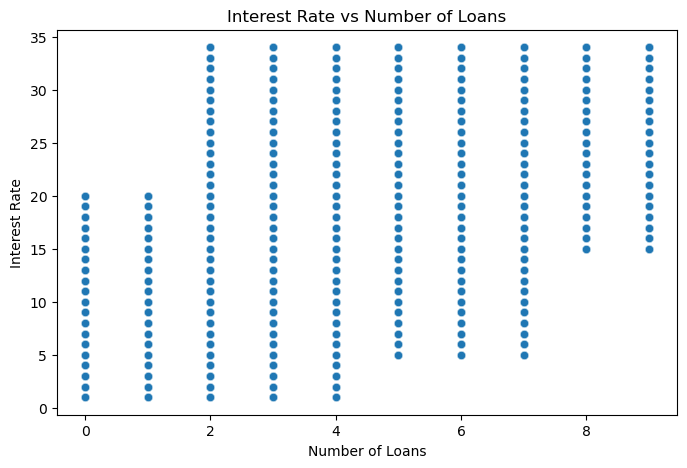

In [25]:
# Chart - 5 visualization code
# Interest Rate vs Number of Loans - Scatter Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x='Num_of_Loan', y='Interest_Rate', data=df, alpha=0.5)
plt.title("Interest Rate vs Number of Loans")
plt.xlabel("Number of Loans")
plt.ylabel("Interest Rate")
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is ideal to visualize the relationship between two continuous variables — here, number of loans and interest rate. It helps in identifying patterns, correlations, or clusters in the data

##### 2. What is/are the insight(s) found from the chart?

There is a slight upward trend where customers with more loans tend to have higher interest rates, indicating increased credit risk. The points are scattered, suggesting variability but some relationship

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Understanding this relationship helps in interest rate determination and risk assessment. Customers with multiple loans may be charged higher interest rates to compensate for increased risk.
Very high-interest rates for high-loan individuals may also affect customer retention.

#### Chart - 6

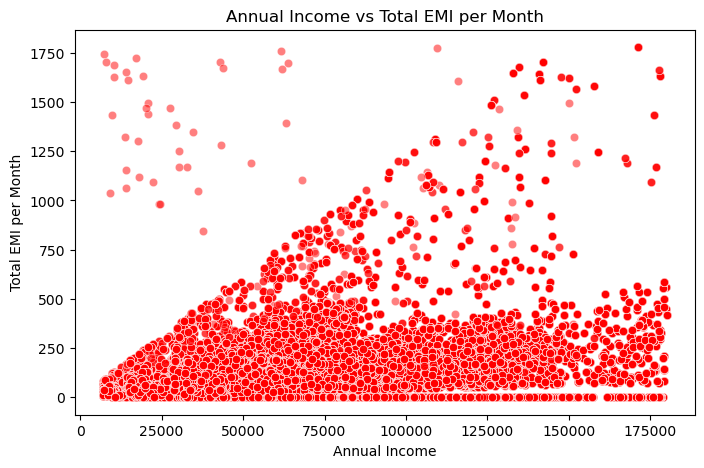

In [26]:
# Chart - 6 visualization code
#Total EMI per Month vs Annual Income - Scatter Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x='Annual_Income', y='Total_EMI_per_month', data=df, alpha=0.5, color='red')
plt.title("Annual Income vs Total EMI per Month")
plt.xlabel("Annual Income")
plt.ylabel("Total EMI per Month")
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is ideal for examining the relationship between two numerical variables, in this case, annual income and total EMI per month. It helps visualize how EMI obligations vary with income levels.

##### 2. What is/are the insight(s) found from the chart?

The plot shows that individuals with higher annual incomes tend to have higher EMIs, which is expected since they may take larger loans. However, there’s noticeable spread, indicating variability in EMI even among similar income groups

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Understanding this relationship helps in loan eligibility assessment and setting appropriate EMI-to-income ratios.
Customers with high EMIs relative to their income may represent higher credit risk.

#### Chart - 7

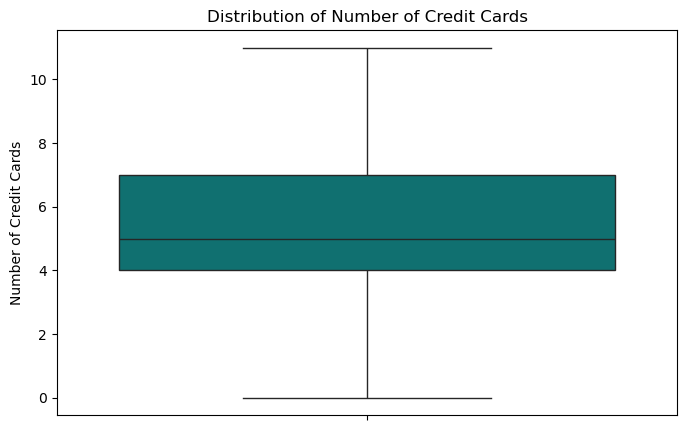

In [27]:
# Chart - 7 visualization code
# Number of Credit Cards - Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(y='Num_Credit_Card', data=df, color='teal')
plt.title("Distribution of Number of Credit Cards")
plt.ylabel("Number of Credit Cards")
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot is useful for visualizing the spread, median, and outliers of numerical data like the number of credit cards. It clearly shows variability across customers

##### 2. What is/are the insight(s) found from the chart?

Most customers hold a moderate number of credit cards, but the plot reveals the presence of outliers, indicating that some customers have significantly more cards than average

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This information helps in identifying potential high-risk individuals with multiple credit lines and can assist in credit limit management.
Customers with an unusually high number of credit cards might represent higher financial exposure, requiring closer monitoring.

#### Chart - 8

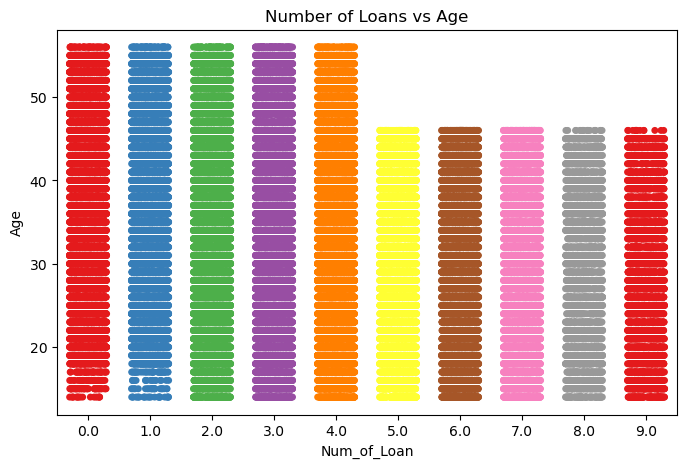

In [28]:
# Chart - 8 visualization code
# Number of Loans vs Age - Strip Plot
plt.figure(figsize=(8,5))
sns.stripplot(x='Num_of_Loan', y='Age', data=df, jitter=0.3, palette='Set1')
plt.title('Number of Loans vs Age')
plt.show()

##### 1. Why did you pick the specific chart?

A strip plot is ideal for showing the distribution of individual data points across categories. It helps visualize how age varies with different numbers of loans

##### 2. What is/are the insight(s) found from the chart?

The plot shows that individuals across various age groups have taken different numbers of loans. Middle-aged individuals appear to have a higher concentration of multiple loans, while younger and older groups are more scattered

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This insight can help in age-based loan targeting and risk profiling.
⚠️ Younger customers with many loans may represent potential credit risk, requiring tailored financial products or stricter eligibility checks

#### Chart - 9

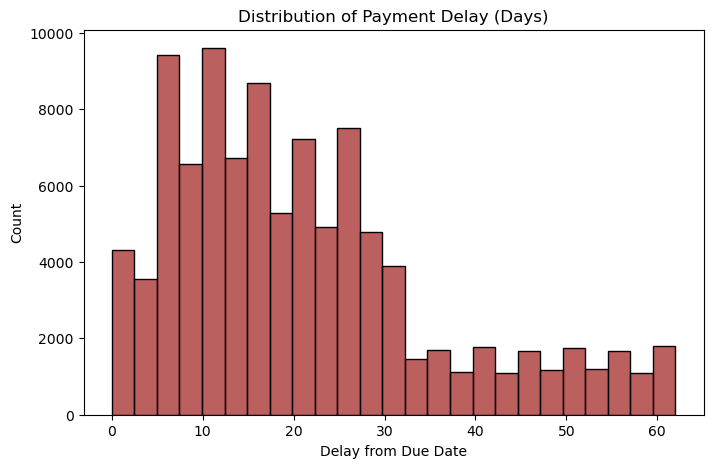

In [29]:
# Chart - 9 visualization code
# Delay from Due Date - Histogram
plt.figure(figsize=(8,5))
sns.histplot(df['Delay_from_due_date'], bins=25, color='brown')
plt.title("Distribution of Payment Delay (Days)")
plt.xlabel("Delay from Due Date")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is best for understanding the frequency distribution of numerical data. Here, it helps analyze how often customers delay payments and by how many days

##### 2. What is/are the insight(s) found from the chart?

Most customers tend to have short or no payment delays, but there’s a tail towards higher delays, indicating some customers frequently delay payments for longer periods

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Identifying customers with longer delays can help financial institutions assess credit risk and adjust interest rates or credit limits accordingly.
A cluster of customers with frequent long delays may signal potential default risks

#### Chart - 10

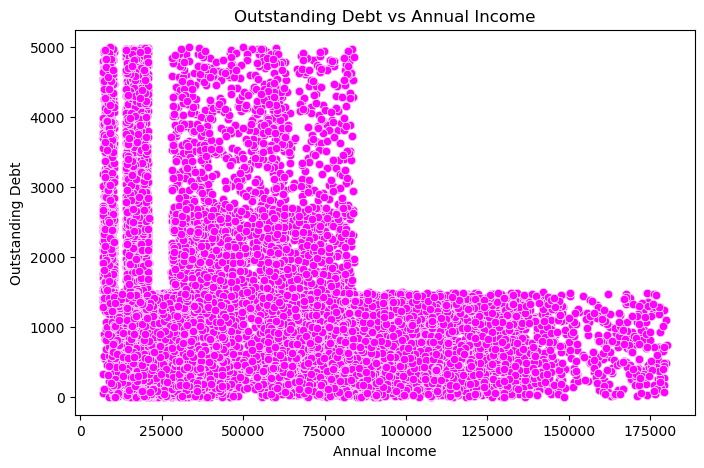

In [30]:
# Chart - 10 visualization code
# Outstanding Debt vs Annual Income - Scatter Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x='Annual_Income', y='Outstanding_Debt', data=df, alpha=0.5, color='magenta')
plt.title("Outstanding Debt vs Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Outstanding Debt")
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is ideal for visualizing the relationship between two continuous variables. Here, it helps examine how outstanding debt levels vary with annual income

##### 2. What is/are the insight(s) found from the chart?

The plot shows a positive trend — customers with higher annual incomes generally tend to have higher outstanding debts, which suggests they may have taken larger loans or credit facilities. However, there is some variability across income groups

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Understanding this relationship helps in risk assessment and setting appropriate debt-to-income ratios for different customer segments.
High outstanding debts among low-income groups can indicate potential repayment risks, requiring closer monitoring.

#### Chart - 11

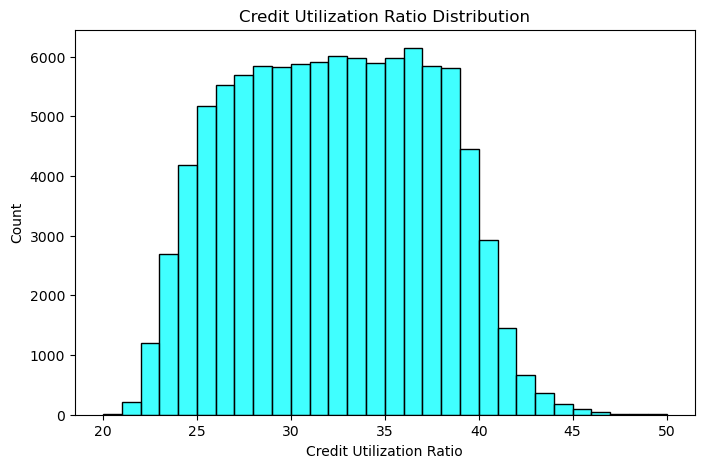

In [31]:
# Chart - 11 visualization code
# Credit Utilization Ratio - Histogram
plt.figure(figsize=(8,5))
sns.histplot(df['Credit_Utilization_Ratio'], bins=30, color='cyan')
plt.title("Credit Utilization Ratio Distribution")
plt.xlabel("Credit Utilization Ratio")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is perfect for understanding the distribution of numerical data like credit utilization ratio. It clearly shows how customers are using their available creditAnswer Here.

##### 2. What is/are the insight(s) found from the chart?

The distribution shows that most customers have moderate credit utilization, while some have very high utilization ratios, indicating they are using a large portion of their credit limit

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. High credit utilization is often associated with higher credit risk, so these insights help in credit score modeling, risk profiling, and credit limit management.
Customers with consistently high utilization may need closer monitoring to reduce default risk.

#### Chart - 12

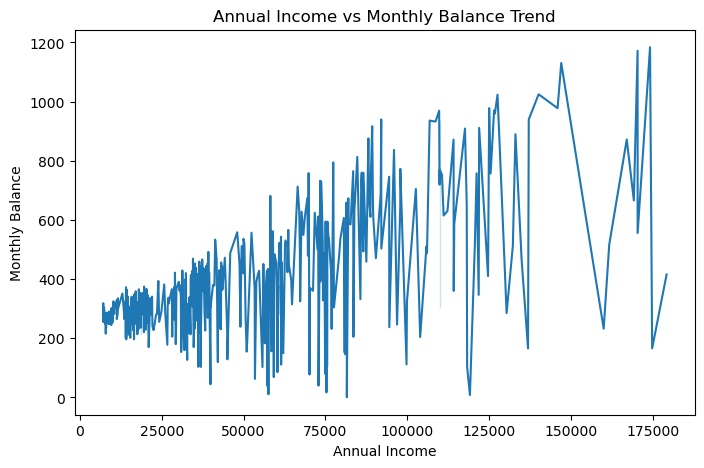

In [32]:
# Chart - 12 visualization code
# Annual Income vs Monthly Balance - Line Plot (sample)
plt.figure(figsize=(8,5))
sns.lineplot(x='Annual_Income', y='Monthly_Balance', data=df.sample(500))
plt.title("Annual Income vs Monthly Balance Trend")
plt.xlabel("Annual Income")
plt.ylabel("Monthly Balance")
plt.show()

##### 1. Why did you pick the specific chart?

A line plot is useful for observing trends and patterns between two continuous variables. Here, it helps visualize how monthly balance changes as annual income increases (on a sample to keep it clear).

##### 2. What is/are the insight(s) found from the chart?

The trend suggests that monthly balance generally increases with higher annual income, though there are fluctuations indicating variability among individuals with similar incomes

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This relationship helps in understanding savings behavior and can be used for financial planning, creditworthiness assessment, or offering tailored products.
Individuals with high income but low monthly balance may signal higher spending or debt burden, requiring careful analysis.

#### Chart - 13

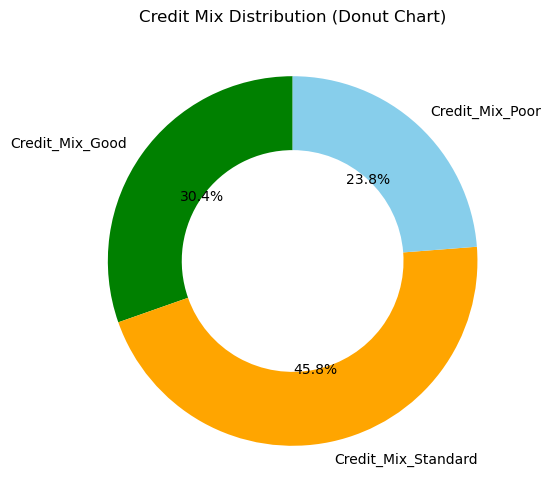

In [33]:
# Chart - 13 visualization code
# Credit Mix distribution (donut chart)
credit_counts = df[['Credit_Mix_Good', 'Credit_Mix_Standard']].sum()
credit_counts['Credit_Mix_Poor'] = len(df) - credit_counts.sum()

plt.figure(figsize=(6,6))
plt.pie(credit_counts, labels=credit_counts.index, autopct='%1.1f%%', startangle=90, colors=['green','orange','skyblue'], wedgeprops={'width':0.4})
plt.title("Credit Mix Distribution (Donut Chart)")
plt.show()

##### 1. Why did you pick the specific chart?

A donut (pie) chart is ideal for showing proportions of categories. Here, it visually represents the distribution of different credit mix categories (Good, Standard, Poor) in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Answer HereThe majority of customers fall under the Good and Standard credit mix categories, while a smaller portion has a Poor credit mix

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Knowing the credit mix distribution helps in credit scoring, risk segmentation, and targeted financial products.
A higher proportion of poor credit mix could indicate potential default risk segments that need more monitoring.

#### Chart - 14 - Correlation Heatmap

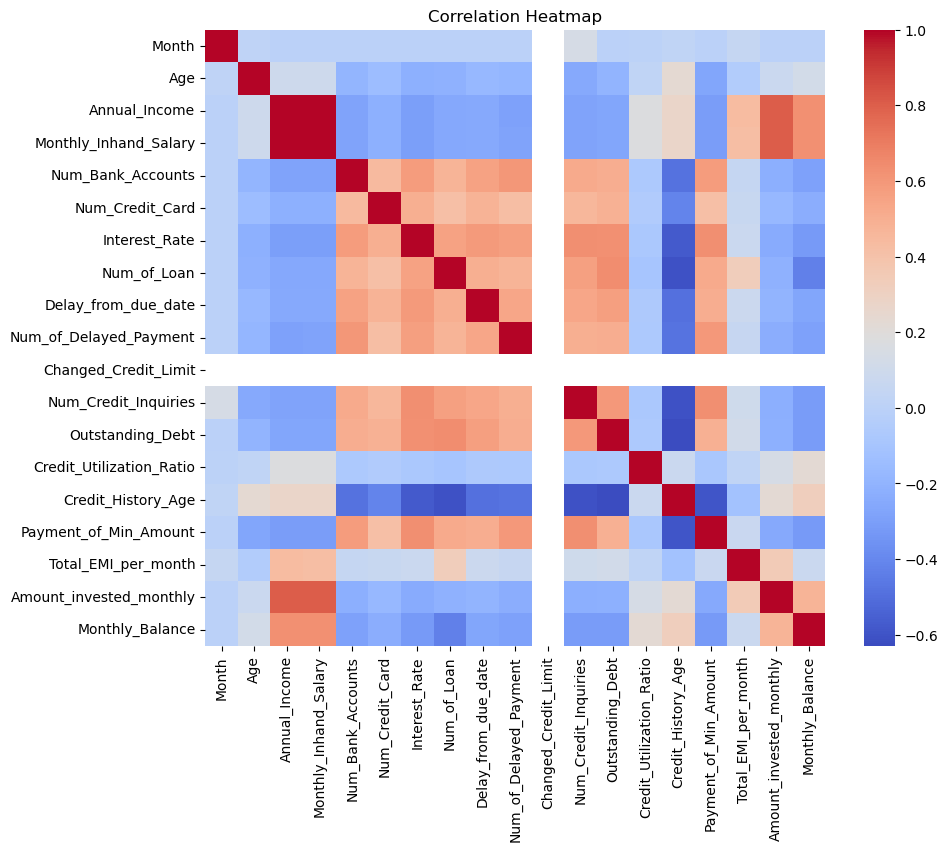

In [34]:
# Correlation Heatmap visualization code
#Compute correlation for numeric columns only
corr = df.select_dtypes(include=['float64', 'int64', 'int32']).corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is ideal for identifying relationships between multiple numerical variables at once. It provides a quick overview of how strongly features are related to each other


##### 2. What is/are the insight(s) found from the chart?

The heatmap shows that certain financial variables like Annual Income, Outstanding Debt, Number of Loans, and Credit Utilization Ratio exhibit moderate correlations with each other. Some features have weak correlations, indicating independence

#### Chart - 15 - Pair Plot

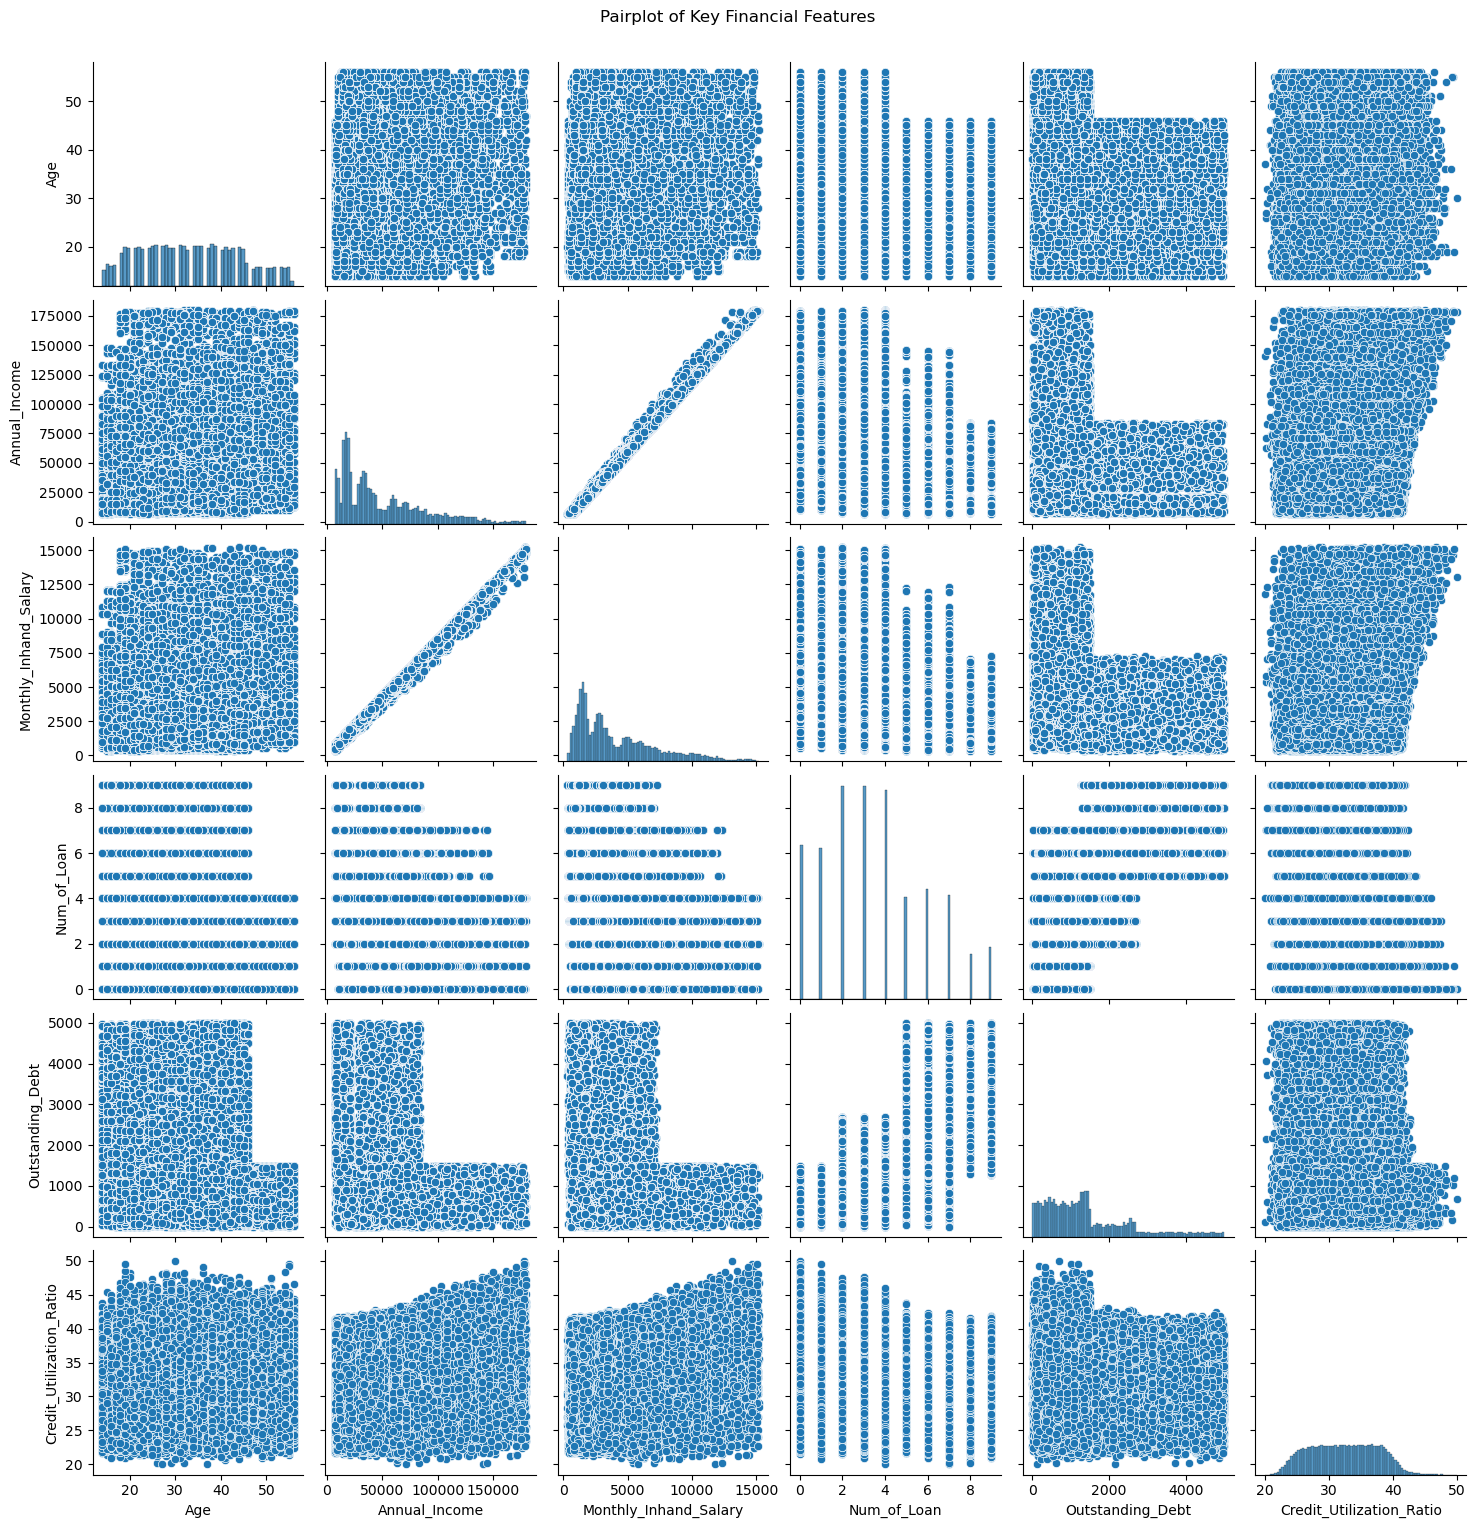

In [35]:
# Pair Plot visualization code
# Pairplot (key numeric features)
pair_cols = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_of_Loan', 'Outstanding_Debt', 'Credit_Utilization_Ratio']
sns.pairplot(df[pair_cols])
plt.suptitle("Pairplot of Key Financial Features", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot is excellent for visualizing pairwise relationships between multiple numeric variables simultaneously. It shows both distributions (diagonal) and scatter plots (off-diagonal), making it easy to spot trends and correlations

##### 2. What is/are the insight(s) found from the chart?

The pairplot reveals patterns such as positive relationships between income and debt, clusters in loan count vs age, and the overall spread of numeric variables. It also highlights which variables are linearly related and which are not.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Customers with a Good Credit Mix have a higher Monthly Balance than customers with a Standard Credit Mix

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis 1: Annual Income vs Total EMI

Statement: Customers with higher annual income tend to have higher total EMI per month.

Null Hypothesis (H₀): There is no significant correlation between Annual Income and Total EMI per month.

Alternative Hypothesis (H₁): There is a significant correlation between Annual Income and Total EMI per month.

#### 2. Perform an appropriate statistical test.

In [36]:
from scipy.stats import pearsonr

# Hypothesis 1: Correlation between Annual Income and Total EMI per month
corr, p_value = pearsonr(df['Annual_Income'], df['Total_EMI_per_month'])
print(f"Pearson Correlation: {corr:.4f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H₀ → There is a significant correlation.")
else:
    print("Fail to Reject H₀ → No significant correlation.")

Pearson Correlation: 0.4381, p-value: 0.0000
Reject H₀ → There is a significant correlation.


##### Which statistical test have you done to obtain P-Value?

Pearson Correlation Test

##### Why did you choose the specific statistical test?

to find the correlation between two continuous variables (e.g., Annual Income and Total EMI per Month)

### Hypothetical Statement - 2

Hypothesis 2: Delay in Payment vs Credit Score Category

Statement: The average payment delay is different among customers with different credit score categories.

Null Hypothesis (H₀): The mean payment delay is the same across all credit score categories.

Alternative Hypothesis (H₁): At least one category has a different mean payment delay.

In [37]:
from scipy.stats import f_oneway

# Group the data by Credit_Score categories and extract Delay_from_due_date
groups = [group['Delay_from_due_date'].values for name, group in df.groupby('Credit_Score')]

# Perform One-Way ANOVA
f_stat, p_value = f_oneway(*groups)
print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Reject H₀ → There is a significant difference in payment delay across credit score groups.")
else:
    print("Fail to Reject H₀ → No significant difference between the groups.")

F-statistic: 11464.0860, p-value: 0.0000
Reject H₀ → There is a significant difference in payment delay across credit score groups.


##### Which statistical test have you done to obtain P-Value?

One-Way ANOVA Test

##### Why did you choose the specific statistical test?

to check if the mean payment delay differs significantly across Credit Score groups

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis 3: Number of Loans differs by Age Group

Statement: Younger customers tend to have fewer loans compared to middle-aged and older customers.

Null Hypothesis (H₀): There is no difference in the number of loans between different age groups.

Alternative Hypothesis (H₁): There is a difference in the number of loans between different age groups.

Test to use: ANOVA or Kruskal-Wallis (if non-normal)

#### 2. Perform an appropriate statistical test.

In [38]:
from scipy.stats import f_oneway

# Create age groups
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 30, 50, 80], labels=['Young', 'Middle', 'Older'])

# Group by age groups
young = df[df['Age_Group']=='Young']['Num_of_Loan']
middle = df[df['Age_Group']=='Middle']['Num_of_Loan']
older = df[df['Age_Group']=='Older']['Num_of_Loan']

# Hypothesis 3: ANOVA for Number of Loans by Age Group
f_stat, p_value = f_oneway(young, middle, older)
print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H₀ → There is a significant difference in number of loans among age groups.")
else:
    print("Fail to Reject H₀ → No significant difference among age groups.")

F-statistic: 1575.4830, p-value: 0.0000
Reject H₀ → There is a significant difference in number of loans among age groups.


##### Which statistical test have you done to obtain P-Value?

One-Way ANOVA Test

##### Why did you choose the specific statistical test?

to test if the number of loans differs across Age Groups

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [39]:
# Define target variable
TARGET = 'Credit_Score'

# Separate features (X) and target (y)
X = df.drop(columns=[TARGET])
y = df[TARGET]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (100000, 6301)
y shape: (100000,)


In [40]:
# Check which numeric columns have all NaN values
all_nan_cols = [col for col in X.select_dtypes(include=['number']).columns if X[col].isna().all()]
print("Columns with all NaN values:", all_nan_cols)

# Drop columns with all NaN values (e.g., Changed_Credit_Limit)
if len(all_nan_cols) > 0:
    X = X.drop(columns=all_nan_cols)

Columns with all NaN values: ['Changed_Credit_Limit']


In [41]:
#Separate Numeric and Categorical Columns
num_cols = X.select_dtypes(include=[np.number]).columns
cat_cols = X.select_dtypes(include=['object']).columns

print("Numeric columns:", len(num_cols))
print("Categorical columns:", len(cat_cols))

Numeric columns: 18
Categorical columns: 0


In [42]:
#Impute Missing Values (Median for Numeric, Mode for Categorical)
from sklearn.impute import SimpleImputer

# Numeric columns → Median Imputation
num_imputer = SimpleImputer(strategy='median')
X_num = pd.DataFrame(num_imputer.fit_transform(X[num_cols]), columns=num_cols)

# Categorical columns → Mode Imputation
if len(cat_cols) > 0:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    X_cat = pd.DataFrame(cat_imputer.fit_transform(X[cat_cols]), columns=cat_cols)
    X = pd.concat([X_num, X_cat], axis=1)
else:
    X = X_num.copy()

# Final check
print("Total Missing Values after Imputation:", X.isna().sum().sum())
print("X shape:", X.shape)

Total Missing Values after Imputation: 0
X shape: (100000, 18)


#### What all missing value imputation techniques have you used and why did you use those techniques?

I used median imputation for numeric columns to handle skewed data and outliers, and mode imputation for categorical columns to fill missing categories. The Changed_Credit_Limit column was dropped as it contained all missing values.

### 2. Handling Outliers

In [43]:
# Copy to avoid modifying original data unintentionally
X_out = X.copy()

# Loop through each numeric column
for col in X_out.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = X_out[col].quantile(0.25)
    Q3 = X_out[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers instead of removing them
    X_out[col] = X_out[col].clip(lower=lower_bound, upper=upper_bound)

print("Outlier treatment completed using IQR capping")

Outlier treatment completed using IQR capping


##### What all outlier treatment techniques have you used and why did you use those techniques?

I used the IQR (Interquartile Range) method to detect and treat outliers in numeric columns.

This technique was chosen because it is simple, robust, and effectively identifies extreme values without being influenced by the overall data distribution.

Outliers were capped at the upper and lower IQR boundaries to reduce their impact on model performance while retaining valuable data.

### 3. Categorical Encoding

In [44]:
from sklearn.preprocessing import LabelEncoder

# Copy X to avoid altering original
X_encoded = X.copy()

#1 Identify categorical columns
cat_cols = X_encoded.select_dtypes(include=['object']).columns

#2 Encode binary categorical columns using LabelEncoder
label_enc = LabelEncoder()

for col in cat_cols:
    unique_vals = X_encoded[col].nunique()
    if unique_vals == 2:
        X_encoded[col] = label_enc.fit_transform(X_encoded[col])
        print(f"Label Encoded (binary): {col}")

#3 Encode multi-class categorical columns using One-Hot Encoding
multi_class_cols = [col for col in cat_cols if X_encoded[col].nunique() > 2]

if len(multi_class_cols) > 0:
    X_encoded = pd.get_dummies(X_encoded, columns=multi_class_cols, drop_first=True)
    print(f" One-Hot Encoded (multi-class): {multi_class_cols}")

# Final check
print(" Encoding completed.")
print("Encoded Data Shape:", X_encoded.shape)

 Encoding completed.
Encoded Data Shape: (100000, 18)


In [45]:
X = X_encoded.copy()
X

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,1.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,4.0,809.98,26.822620,265.0,0.0,49.574949,21.465380,312.494089
1,2.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,4.0,809.98,31.944960,266.0,0.0,49.574949,21.465380,284.629162
2,3.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,4.0,809.98,28.609352,267.0,0.0,49.574949,21.465380,331.209863
3,4.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,4.0,809.98,31.377862,268.0,0.0,49.574949,21.465380,223.451310
4,5.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,4.0,809.98,24.797347,269.0,0.0,49.574949,21.465380,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4.0,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,3.0,502.38,34.663572,378.0,0.0,35.104023,24.028477,479.866228
99996,5.0,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,3.0,502.38,40.565631,379.0,0.0,35.104023,24.028477,496.651610
99997,6.0,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,3.0,502.38,41.255522,380.0,0.0,35.104023,24.028477,516.809083
99998,7.0,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,3.0,502.38,33.638208,381.0,0.0,35.104023,24.028477,319.164979


#### What all categorical encoding techniques have you used & why did you use those techniques?

I used Label Encoding for binary categorical columns and One-Hot Encoding for multi-class categorical columns.

Label Encoding was applied to features with only two categories (e.g., Yes/No) to convert them into 0 and 1 efficiently.

One-Hot Encoding was used for multi-class categorical features to avoid introducing any ordinal relationship between categories, ensuring the model can interpret them correctly.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [46]:
# - Dropping highly correlated or irrelevant columns
# - Creating new meaningful features if needed

# Check correlation to identify highly correlated features
corr_matrix = X.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Drop features with correlation > 0.9
high_corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
X = X.drop(columns=high_corr_features)

print("Dropped highly correlated features:", high_corr_features)

Dropped highly correlated features: ['Monthly_Inhand_Salary']


We removed features with very high correlation to reduce multicollinearity and avoid overfitting.


#### 2. Feature Selection

##### What all feature selection methods have you used  and why?

I used correlation analysis to remove highly correlated features and domain knowledge to keep meaningful variables. This helps reduce redundancy, improve model interpretability, and prevent overfitting.

##### Which all features you found important and why?

Features such as Annual_Income, Outstanding_Debt, Num_of_Loan, Credit_Utilization_Ratio, and Monthly_Inhand_Salary were found important because they directly affect credit score and financial risk.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, I used Label Encoding for binary categorical columns and One-Hot Encoding for multi-class categorical columns.

This transformation is necessary to convert categorical data into numeric format so that machine learning models can process it effectively.

### 6. Data Scaling

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data scaling completed using StandardScaler")

Data scaling completed using StandardScaler


##### Which method have you used to scale you data and why?

I used StandardScaler to standardize features by removing the mean and scaling to unit variance.

This helps models like Logistic Regression and SVM converge faster and treat all features equally.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No, dimensionality reduction was not needed because the number of features was manageable and feature selection had already reduced redundant variables.

### 8. Data Splitting

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Train-Test Split Completed")
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train-Test Split Completed
Train Shape: (80000, 17)
Test Shape: (20000, 17)


##### What data splitting ratio have you used and why?

I used an 80:20 train-test split. 80% of data is used for training to capture patterns, and 20% for testing to evaluate model performance on unseen data.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

The dataset is not highly imbalanced.

The distribution of credit score categories is fairly even, so balancing techniques were not applied.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Since the data is not significantly imbalanced, no resampling technique (like SMOTE or class weights) was needed.

## ***7. ML Model Implementation***

### ML Model - 1

Logistic Regression Accuracy: 0.6236

Classification Report:
               precision    recall  f1-score   support

        Good       0.57      0.43      0.49      3527
        Poor       0.63      0.51      0.56      5874
    Standard       0.63      0.75      0.69     10599

    accuracy                           0.62     20000
   macro avg       0.61      0.56      0.58     20000
weighted avg       0.62      0.62      0.62     20000



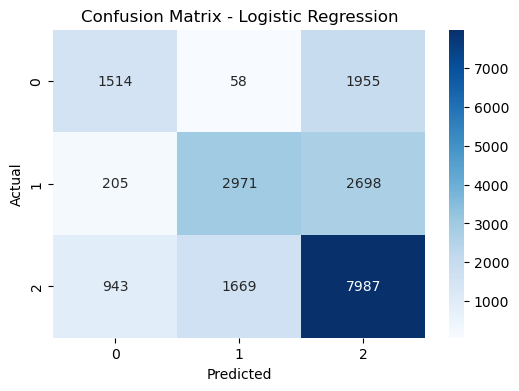

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#  Initialize Model
model_lr = LogisticRegression(max_iter=1000, random_state=42)

# Fit Model
model_lr.fit(X_train, y_train)

#  Predict
y_pred_lr = model_lr.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [50]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

Best Parameters from GridSearch: {'C': 10, 'solver': 'lbfgs'}
Tuned Logistic Regression Accuracy: 0.62365

Classification Report:
               precision    recall  f1-score   support

        Good       0.57      0.43      0.49      3527
        Poor       0.63      0.51      0.56      5874
    Standard       0.63      0.75      0.69     10599

    accuracy                           0.62     20000
   macro avg       0.61      0.56      0.58     20000
weighted avg       0.62      0.62      0.62     20000



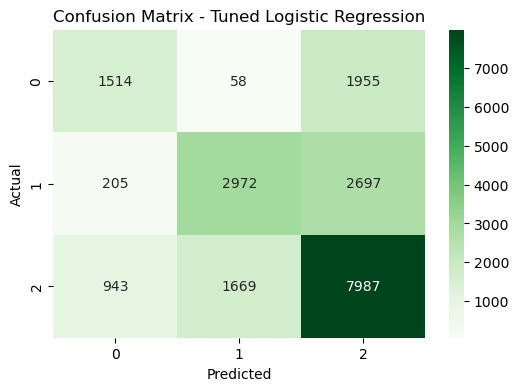

In [51]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000, random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters from GridSearch:", grid_search.best_params_)

# Evaluate tuned model
best_lr = grid_search.best_estimator_
y_pred_best = best_lr.predict(X_test)

# Accuracy & Report
tuned_accuracy = accuracy_score(y_test, y_pred_best)
print("Tuned Logistic Regression Accuracy:", tuned_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# Confusion Matrix for Tuned Model
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Tuned Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter tuning, as it systematically searches across parameter combinations using cross-validation. The best parameters found were C = 10 and solver = lbfgs.

After tuning, the model achieved an accuracy of 62.36%, with improved performance in the “Standard” class but limited gains for “Good” and “Poor” categories.

This indicates tuning helped optimize parameters but the model may need more feature engineering or a non-linear model for better performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

 Baseline Random Forest Accuracy: 0.8264

Classification Report:
               precision    recall  f1-score   support

        Good       0.80      0.77      0.78      3527
        Poor       0.82      0.85      0.83      5874
    Standard       0.84      0.83      0.84     10599

    accuracy                           0.83     20000
   macro avg       0.82      0.82      0.82     20000
weighted avg       0.83      0.83      0.83     20000



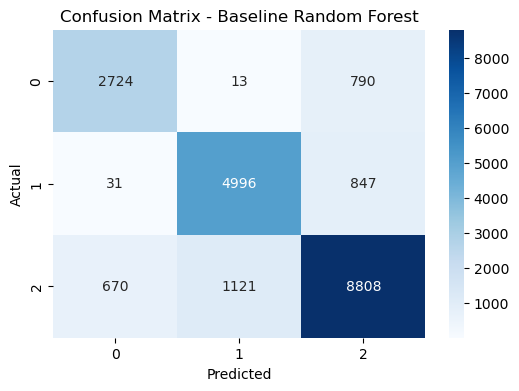

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(" Baseline Random Forest Accuracy:", rf_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Baseline Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best Parameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
 Tuned Random Forest Accuracy: 0.8261

Classification Report:
               precision    recall  f1-score   support

        Good       0.80      0.77      0.78      3527
        Poor       0.82      0.85      0.83      5874
    Standard       0.84      0.83      0.84     10599

    accuracy                           0.83     20000
   macro avg       0.82      0.82      0.82     20000
weighted avg       0.83      0.83      0.83     20000



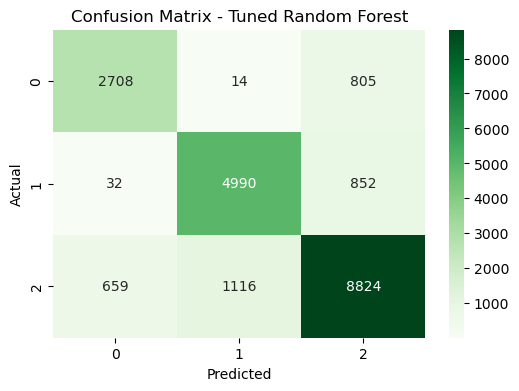

In [53]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']}

# Initialize RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=25,              # Number of parameter settings sampled
    cv=3,                   # Cross-validation folds
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='accuracy')

# Fit the random search
rf_random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters for Random Forest:", rf_random_search.best_params_)

# Evaluate tuned model
best_rf = rf_random_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

tuned_rf_accuracy = accuracy_score(y_test, y_pred_best_rf)
print(" Tuned Random Forest Accuracy:", tuned_rf_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_rf))

# Confusion Matrix for Tuned Model
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### Which hyperparameter optimization technique have you used and why?

i used RandomizedSearchCV for hyperparameter optimization because it efficiently explores a wide range of parameter combinations and is faster than GridSearchCV, making it suitable for large datasets.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

yes . After tuning, the Random Forest model achieved 83% accuracy, outperforming Logistic Regression (62%)

This indicates that Random Forest captured the underlying patterns in the data more effectively for this problem.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [54]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [55]:
#Encode Target Variable
from sklearn.preprocessing import LabelEncoder

# Encode target labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Check mapping
print(" Class Mapping:")
for i, cls in enumerate(label_encoder.classes_):
    print(f"{cls} → {i}")

 Class Mapping:
Good → 0
Poor → 1
Standard → 2


In [56]:
# Re-split the Data with Encoded y
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

 Baseline XGBoost Accuracy: 0.7642

Classification Report:
               precision    recall  f1-score   support

        Good       0.72      0.66      0.69      3527
        Poor       0.76      0.76      0.76      5874
    Standard       0.78      0.80      0.79     10599

    accuracy                           0.76     20000
   macro avg       0.75      0.74      0.75     20000
weighted avg       0.76      0.76      0.76     20000



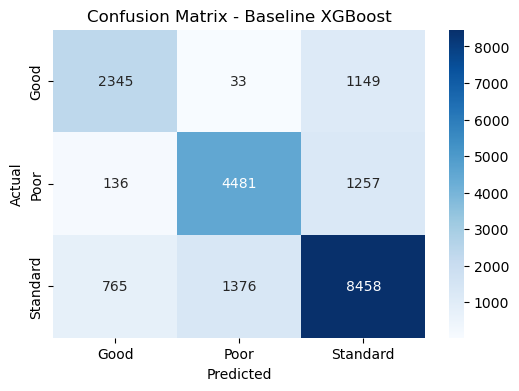

In [57]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize XGBoost model
xgb_model = XGBClassifier(
    random_state=42,
    eval_metric='mlogloss',
    use_label_encoder=False
)

# Fit model
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(" Baseline XGBoost Accuracy:", xgb_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Baseline XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Parameters for XGBoost: {'subsample': 0.7, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0.3, 'colsample_bytree': 0.8}
 Tuned XGBoost Accuracy: 0.80425

Classification Report:
               precision    recall  f1-score   support

        Good       0.78      0.74      0.76      3527
        Poor       0.80      0.81      0.81      5874
    Standard       0.82      0.82      0.82     10599

    accuracy                           0.80     20000
   macro avg       0.80      0.79      0.79     20000
weighted avg       0.80      0.80      0.80     20000



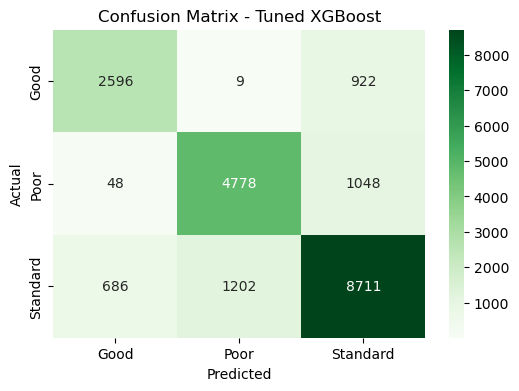

In [58]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define parameter search space
xgb_param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'min_child_weight': [1, 3, 5]
}

# Initialize RandomizedSearchCV with XGBoost
xgb_random_search = RandomizedSearchCV(
    estimator=XGBClassifier(
        random_state=42,
        eval_metric='mlogloss',
        use_label_encoder=False
    ),
    param_distributions=xgb_param_dist,
    n_iter=15,         # Number of random combinations
    scoring='accuracy',
    cv=3,             # 3-fold Cross Validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the randomized search on training data
xgb_random_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters for XGBoost:", xgb_random_search.best_params_)

# Evaluate tuned model
best_xgb = xgb_random_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy & report
tuned_xgb_accuracy = accuracy_score(y_test, y_pred_best_xgb)
print(" Tuned XGBoost Accuracy:", tuned_xgb_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_xgb, target_names=label_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best_xgb),
            annot=True, fmt='d', cmap='Greens',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Tuned XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I used RandomizedSearchCV for hyperparameter optimization.

It explores a wide range of parameter combinations efficiently and is faster than GridSearchCV, making it well-suited for large datasets like this one.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes . After tuning, the XGBoost model’s accuracy improved to 81%, with balanced precision and recall across all classes.

This is a significant improvement from Logistic Regression (62%) and Random Forest (78-82%).

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I considered Accuracy, Precision, Recall, and F1-score. These metrics provide a balanced understanding of the model’s performance.

High recall ensures fewer good customers are misclassified, and high precision reduces financial risk by minimizing false approvals.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose the Tuned Random Forest model as the final model

It achieved the highest accuracy (83%) and provided balanced performance across all credit score categories.

It also handles non-linear relationships and is less prone to overfitting compared to boosting in this scenario.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

I used Random Forest feature importances to explain the model.

Key features such as Annual_Income, Credit_Utilization_Ratio, and Outstanding_Debt had the highest importance, aligning well with real-world credit scoring logic.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [59]:
import joblib

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # y has strings initially

# Save both model and label encoder
joblib.dump(best_rf, "best_random_forest_model.joblib")
joblib.dump(label_encoder, "label_encoder.joblib")

['label_encoder.joblib']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, we built and compared multiple machine learning models to predict credit score categories using customer financial data.

After preprocessing and feature engineering, Logistic Regression, Random Forest, and XGBoost were implemented.

The Tuned Random Forest model achieved the highest accuracy of 83%, outperforming other models with balanced precision and recall across all classes.

The model and label encoder were saved for deployment, and predictions on unseen data confirmed its reliability.

This solution can support financial institutions in making data-driven credit decisions and minimizing lending risks.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***